# Analiza zależnościowa

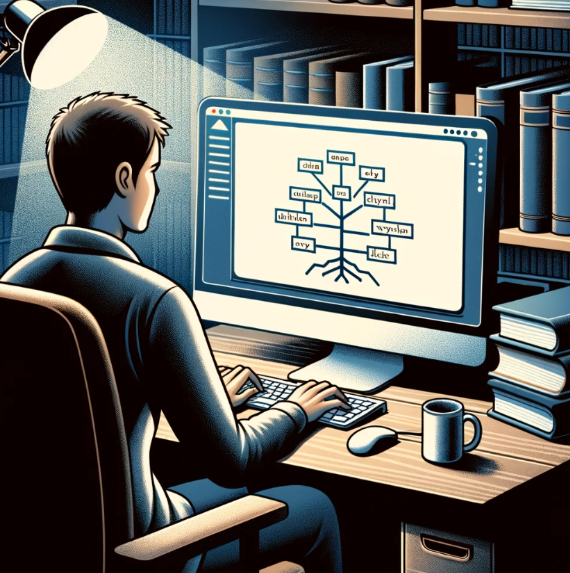

## Wstęp

Język, którym posługujemy się na co dzień, funkcjonuje na zasadzie kompozycyjności. Oznacza to, że znaczenie złożonych wyrażeń językowych można wywnioskować z ich części składowych i z relacji między nimi. Ta właściwość pozwala użytkownikom języka na daleko idącą kreatywność w sposobie konstruowania wypowiedzi, przy zachowaniu precyzji komunikacji. Sposób w jaki słowa w zdaniu są ze sobą związane, tworzy strukturę ukorzenionego drzewa. Problemem, który rozważamy w tym zadaniu, jest automatyczna konstrukcja takich drzew dla zdań w języku polskim. Problem nosi nazwę analizy składniowej zdań, a konkretnie dokonywać będziemy analizy zależnościowej. 

Analiza składniowa jest w ogólności trudna. Na przykład, mimo że zdania `(1) Maria do jutra jest zajęta.` oraz `(2) Droga do domu jest zajęta.` zawierają kolejno te same części mowy, w dodatku o dokładnie tej samej formie gramatycznej, to w zdaniu (1) fraza "do jutra" modyfikuje czasownik "jest zajęta", natomiast w zdaniu (2) fraza "do domu" jest podrzędnikiem rzeczownika "droga". W dodatku, czasami nawet natywni użytkownicy języka mogą zinterpretować strukturę zdania na dwa różne sposoby: zdanie `Zauważyłem dziś samochód Adama, którego dawno nie widziałem.` może być interpretowane na dwa sposoby w zależności od tego, do czego odnosi się "którego": czy do "samochodu Adama", czy może do "Adama".

Istnieje wiele różnych algorytmów rozwiązujących problem analizy zależnościowej. Klasyczne metody przetwarzają zdanie słowo po słowie, od lewej do prawej i wstawiają krawędzie w oparciu albo o pewien ustalony zbiór reguł lub o algorytm uczenia maszynowego. W tym zadaniu użyjemy innej metody. Twoim zadaniem będzie przewidzenie drzewa zależnościowego w oparciu o wektory słów otrzymane modelem HerBERT.

HerBERT to polska wersja BERT, który jest modelem językowym i działa następująco:
1. BERT posiada moduł nazywany tokenizatorem (ang. tokenizer), który dzieli zdanie na pewne podsłowa. Na przykład zdanie `Dostaję klucz i biegnę do swojego pokoju.` dzieli na `'Dosta', 'ję', 'klucz', 'i', 'bieg', 'nę', 'do', 'swojego', 'pokoju', '.'`. Tokenizator jest wyposażony w słownik, który podsłowom przypisuje unikalne liczby: w praktyce zatem otrzymujemy mało zrozumiałe dla człowieka `18577, 2779, 22816, 1009, 4775, 2788, 2041, 5058, 7217, 1899`.
1. Następnie BERT posiada słownik, który zamienia te liczby na wektory o długości 768. Otrzymujemy zatem macierz o rozmiarach `10 x 768`.
1. BERT posiada 12 warstw, z których każda bierze wynik poprzedniej i wykonuje na niej pewną transformację. Szczegóły nie są istotne w tym zadaniu! Ważne jest natomiast to, że cały model jest uczony automatycznie, przy użyciu dużych korpusów tekstu. Zinterpretowanie działania każdej warstwy jest niemożliwe! Natomiast być może w skomplikowanym algorytmie, którego nauczył się BERT różne warstwy pełnią różne role.

## Zadanie

Twoim zadaniem będzie automatyczna analiza składniowa zdań w języku polskim. Pominiemy dokładne objaśnienie sposobu konstruowania takich drzew, możesz samemu popatrzeć na przykłady! Dostaniesz zbiór danych treningowych zawierający 1000 przykładów rozkładów zdań. W pliku `train.conll` znajdują się poetykietowane zdania, na przykład:

| # | Word      | - | - | - | - | Head | - | - | - |
|---|-----------|---|---|---|---|--------|---|---|---|
| 1 | Wyobraź   | _ | _ | _ | _ | 0      | _ | _ | _ |
| 2 | sobie     | _ | _ | _ | _ | 1      | _ | _ | _ |
| 3 | człowieka | _ | _ | _ | _ | 1      | _ | _ | _ |
| 4 | znajdującego | _ | _ | _ | _ | 3    | _ | _ | _ |
| 5 | się       | _ | _ | _ | _ | 4      | _ | _ | _ |
| 6 | na        | _ | _ | _ | _ | 4      | _ | _ | _ |
| 7 | ogromnej  | _ | _ | _ | _ | 8      | _ | _ | _ |
| 8 | górze     | _ | _ | _ | _ | 6      | _ | _ | _ |
| 9 | .         | _ | _ | _ | _ | 1      | _ | _ | _ |

Co jest sposobem na zakodowanie następującego drzewa składniowego zdania złożonego:
```
      Wyobraź                          
   ______|_____________                 
  |      |         człowieka           
  |      |             |                
  |      |        znajdującego         
  |      |      _______|__________      
  |      |     |                  na   
  |      |     |                  |     
  |      |     |                górze  
  |      |     |                  |     
sobie    .    się              ogromnej
```
Dostarczamy Ci funkcję w Pythonie służącą do wczytania przykładów z tego pliku i na ich wizualizację. Twoje rozwiązanie powinno:
1. Dzielić zdanie na podsłowa.
1. Dla każdego podsłowa przypisywać wektor. Należy użyć tutaj finalnych lub pośrednich wektorów wyliczonych przez model HerBERT.
1. Agregować wektory podsłów tak aby otrzymać wektory słów.
1. Zaimplementować i wyuczyć prosty model przewidujący odległości w drzewie i głębokości w drzewie poszczególnych słów w zdaniu.
1. Użyć modeli odległości i głębokości do skonstruowania drzewa składniowego.


## Ograniczenia
- Twoje finalne rozwiązanie będzie testowane w środowisku **bez** GPU.
- Ewaluacja twojego rozwiązania (bez treningu) na 200 przykładach testowych powinna trwać nie dłużej niż 5 minut na Google Colab bez GPU.
- Do dyspozycji masz model typu BERT: `allegro/herbert-base-cased` oraz tokenizer `allegro/herbert-base-cased`. Nie wolno korzystać z innych uprzednio wytrenowanych modeli oraz ze zbiorów danych innych niż dostarczony. 
- Lista dopuszczalnych bibliotek: `transformers`, `nltk`, `torch`. 

## Uwagi i wskazówki
- Liczne wskazówki znajdują się we wzorcach funkcji, które powinieneś zaimplementować.

## Pliki zgłoszeniowe
Rozwiązanie zadania stanowi plik archiwum zip zawierające:
1. Ten notebook
2. Plik z wagami modelu odległości: `distance_model.pth`
3. Plik z wagami modelu głębokości: `depth_model.pth`

Uruchomienie całego notebooka z flagą `FINAL_EVALUATION_MODE` ustawioną na `False` powinno w maksymalnie 10 minut skutkować utworzeniem obu plików z wagami.

## Ewaluacja
Podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`, a następnie zostanie uruchomiony cały notebook.
Zaimplementowana przez Ciebie funkcja `parse_sentence`, której wzorzec znajdziesz na końcu tego notatnika, zostanie oceniona na 200 przykładach testowych.
Ewaluacja będzie podobna do tej zaimplementowanej w funkcji `evaluate_model`. 
Pamiętaj jednak, że ostateczna funkcja do ewaluacji sprawdzała będzie dodatkowo, czy zwracane przez twoją funkcję `parse_sentence` drzewa są poprawne!

Ewaluacja nie może zajmować więcej niż 3 minuty. Możesz uruchomić walidację swojego rozwiązania na dostarczonym zbiorze danych walidacyjnych na Google Colab, aby przekonać się czy nie przekraczasz czasu.
Za pomocą skryptu `validation_script.py` będziesz mógł upewnić się, że Twoje rozwiązanie zostanie prawidłowo wykonane na naszych serwerach oceniających:

```
python3 validation_script.py --train
python3 validation_script.py
```

Podczas sprawdzania zadania, użyjemy dwóch metryk: UUAS oraz root placement.
1. Root placemenet oznacza ułamek przykładów na których poprawnie wskażesz korzeń drzewa składniowego,
2. UUAS dla konkretnego zdania to ułamek poprawnie umieszczonych krawędzi. UUAS dla zbioru to średnia wyników dla poszczególnych zdań.


Twój wynik za to zadanie zostanie wyliczony za pomocą funkcji:
```Python
def score(root_placement, uuas):
    def scale(x, lower=0.5, upper=0.85):
        scaled = min(max(x, lower), upper)
        return (scaled - lower) / (upper - lower)
    return (scale(root_placement) + scale(uuas)) / 2
```
Innymi słowy, twój wynik jest średnią wyników za root placement i UUAS. Wynik za daną metrykę jest 0 jeśli wartość danej metryki jest poniżej 0.5 i 1 jeśli jest powyżej 0.85. Pomiędzy tymi wartościami, wynik rośnie liniowo z wartością metryki.

# Kod startowy

In [ ]:
FINAL_EVALUATION_MODE = False  # W czasie sprawdzania twojego rozwiązania, zmienimy tą wartość na True
DEPTH_MODEL_PATH = 'depth_model.pth'  # Nie zmieniaj!
DISTANCE_MODEL_PATH = 'distance_model.pth'  # Nie zmieniaj!

In [ ]:
from typing import List

import numpy as np
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import (AutoModel, AutoTokenizer, PreTrainedModel,
                          PreTrainedTokenizer)
from utils import (ListDataset, ParsedSentence, Sentence, merge_subword_tokens,
                   read_conll, uuas_score)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")
model = AutoModel.from_pretrained("allegro/herbert-base-cased")

In [4]:
train_sentences = read_conll('train.conll')  # 1000 zdań
val_sentences = read_conll('valid.conll')  # 200 zdań

train_sentences[6].pretty_print()  # wyświetl drzewo jednego zdania
print(train_sentences[6])

      Wyobraź                          
   ______|_____________                 
  |      |         człowieka           
  |      |             |                
  |      |        znajdującego         
  |      |      _______|__________      
  |      |     |                  na   
  |      |     |                  |     
  |      |     |                górze  
  |      |     |                  |     
sobie    .    się              ogromnej

Wyobraź sobie człowieka znajdującego się na ogromnej górze .


# Twoje rozwiązanie

In [5]:
def get_distances(sentence: ParsedSentence):
    """Znajdź odległości między każdą parą słów w zdaniu.
    Zwraca macierz numpy o wymiarach (len(sentence), len(sentence))."""

    # TODO: implement me
    ...

    return distances

print(get_distances(train_sentences[1]))


[[0. 1. 2. 3. 2. 3. 3. 2. 3. 4. 1. 3. 2. 3. 4. 5. 2.]
 [1. 0. 1. 2. 3. 4. 4. 3. 4. 5. 2. 4. 3. 4. 5. 6. 3.]
 [2. 1. 0. 1. 4. 5. 5. 4. 5. 6. 3. 5. 4. 5. 6. 7. 4.]
 [3. 2. 1. 0. 5. 6. 6. 5. 6. 7. 4. 6. 5. 6. 7. 8. 5.]
 [2. 3. 4. 5. 0. 3. 3. 2. 3. 4. 1. 3. 2. 3. 4. 5. 2.]
 [3. 4. 5. 6. 3. 0. 2. 1. 2. 3. 2. 4. 3. 4. 5. 6. 3.]
 [3. 4. 5. 6. 3. 2. 0. 1. 2. 3. 2. 4. 3. 4. 5. 6. 3.]
 [2. 3. 4. 5. 2. 1. 1. 0. 1. 2. 1. 3. 2. 3. 4. 5. 2.]
 [3. 4. 5. 6. 3. 2. 2. 1. 0. 1. 2. 4. 3. 4. 5. 6. 3.]
 [4. 5. 6. 7. 4. 3. 3. 2. 1. 0. 3. 5. 4. 5. 6. 7. 4.]
 [1. 2. 3. 4. 1. 2. 2. 1. 2. 3. 0. 2. 1. 2. 3. 4. 1.]
 [3. 4. 5. 6. 3. 4. 4. 3. 4. 5. 2. 0. 1. 2. 3. 4. 3.]
 [2. 3. 4. 5. 2. 3. 3. 2. 3. 4. 1. 1. 0. 1. 2. 3. 2.]
 [3. 4. 5. 6. 3. 4. 4. 3. 4. 5. 2. 2. 1. 0. 1. 2. 3.]
 [4. 5. 6. 7. 4. 5. 5. 4. 5. 6. 3. 3. 2. 1. 0. 1. 4.]
 [5. 6. 7. 8. 5. 6. 6. 5. 6. 7. 4. 4. 3. 2. 1. 0. 5.]
 [2. 3. 4. 5. 2. 3. 3. 2. 3. 4. 1. 3. 2. 3. 4. 5. 0.]]


In [16]:
def get_bert_embeddings(
    sentences_s: List[str],
    tokenizer: PreTrainedTokenizer, 
    model: PreTrainedModel,
    progress_bar: bool = False,
):
    """
    Funkcja zwraca embeddingi podsłów dla listy zdań.

    Argumenty:
        sentences_s: Lista zdań. Każde zdanie jest reprezentowane jako string.
        tokenizer: Tokenizator HERBERT
        model: Model HERBERT
        progress_bar: Czy wyświetlać pasek postępu.

    Zwraca:
        tokens: Lista, która dla każdego zdania zawiera listę tokenów podsłów tego zdania.
        embeddings: Lista, która dla każdego zdania zawiera listę tensorów o wymiarach 
            (seq_len, emb_dim). Zauważ, że seq_len może być różne dla różnych zdań.
    """

    # Wskazówki:
    #  1. Możesz użyć funkcji:
    #   encoded = tokenizer.batch_encode_plus(...)
    #   with torch.no_grad():
    #     model(**encoded, output_hidden_states=True)
    #  2. Aby przyspieszyć obliczenia, pamiętaj o zgrupowaniu (batching) zdań, przed podaniem ich do modelu.
    #  3. Pamiętaj, że każde zdanie może mieć inną długość, więc żeby wypełnić dodatkowe miejsce w zwracanym
    #   tensorze, HERBERT zastosuje padding. Pamiętaj o usunięciu paddingu z wyników.
    #  4. Tokenizator i model używa specjalnych tokenów (np. początku i końca zdania), które również powinny 
    #   zostać usunięte.

    # TODO: implement me
    ...

    return tokens, embeddings


In [ ]:
def get_word_embeddings(sentences: List[Sentence], tokenizer, model):
    """Funkcja zwraca embeddingi słów dla listy zdań, używając modelu i tokenizatora."""

    # Wskazówki:
    #  1. Użyj funkcji get_bert_embeddings do uzyskania embeddingów podsłów.
    #  2. Użyj funkcji merge_subword_tokens do uzyskania embeddingów słów.

    # TODO: implement me
    ...

    return embeddings

In [ ]:
def get_datasets(sentences: List[ParsedSentence], tokenizer, model):
    embeddings = get_word_embeddings(sentences, tokenizer, model)
    distances = [get_distances(sent) for sent in sentences]
    depths = [dist[sent.root][..., None] for dist, sent in zip(distances, sentences)]
    dataset_dist = ListDataset(list(zip(embeddings, distances, sentences)))
    dataset_depth = ListDataset(list(zip(embeddings, depths, sentences)))
    return dataset_dist, dataset_depth


if not FINAL_EVALUATION_MODE:
    trainset_dist, trainset_depth =  get_datasets(train_sentences, tokenizer, model)
    valset_dist, valset_depth = get_datasets(val_sentences, tokenizer, model)

In [8]:
def pad_arrays(sequence, pad_with=np.inf):
    """
    Zakłada, że sequence zawiera tablice (ndarrays) o takiej samej liczbie wymiarów.
    Zwraca tensor, zawierający dane dopełnione do tych samych wymiarów wartością pad_with, 
    gdzie indeks sekwencji odpowiada pierwszemu wymiarowi.
    """

    shapes = np.array([list(seq.shape) for seq in sequence])
    max_lens = list(shapes.max(axis=0))
    padded = [np.pad(
                seq, 
                tuple((0, max_lens[i] - seq.shape[i]) for i in range(seq.ndim)), 
                'constant', 
                constant_values=pad_with
            ) for seq in sequence]
    return torch.tensor(padded)


def collate_fn(batch):
    embeddings, targets, sentences = zip(*batch)
    padded_embeddings = pad_arrays(embeddings, pad_with=0)
    padded_targets = pad_arrays(targets, pad_with=np.inf)
    mask = padded_targets != torch.inf
    return padded_embeddings, padded_targets, mask, sentences


if not FINAL_EVALUATION_MODE:
    dist_trainloader = DataLoader(trainset_dist, batch_size=32, shuffle=True, collate_fn=collate_fn)
    dist_valloader = DataLoader(valset_dist, batch_size=32, shuffle=False, collate_fn=collate_fn)

    depth_trainloader = DataLoader(trainset_depth, batch_size=32, shuffle=True, collate_fn=collate_fn)
    depth_valloader = DataLoader(valset_depth, batch_size=32, shuffle=False, collate_fn=collate_fn)

# dist_trainloader i dist_valloader zwracają krotki (embeddings, distances, masks, sentences)
# depths_trainloader i depths_valloader zwracają krotki (embeddings, depths, masks, sentences)  
# embeddings.shape: (batch_size, max_seq_len, emb_dim)
# distances.shape: (batch_size, max_seq_len, max_seq_len)
# depths.shape: (batch_size, max_seq_len, 1)

In [9]:
class DistanceModel(torch.nn.Module):
    def __init__(self):
        # TODO: implement me
        ...

    def forward(self, x):
        # TODO: implement me
        ...


class DepthModel(torch.nn.Module):
    def __init__(self):
        # TODO: implement me
        ...

    def forward(self, x):
        # TODO: implement me
        ...

In [ ]:
def loss_fn(output, target, mask):
    # mask, target, output to tensory o tym samym kształcie
    # mask zawiera 1 tam, gdzie target zawiera dane, a 0 tam, gdzie jest padding

    # TODO: implement me
    ...


def train_model(model, dataloader, valloader, epochs, lr):
    """Pętla ucząca twoich modeli."""
    # TODO: implement me
    ...


# W czasie ewaluacji, modele nie powinny być ponownie trenowane.
if not FINAL_EVALUATION_MODE: 
    print("Training depth model")
    depth_model = DepthModel()
    # TODO: ustaw hiperparametry
    train_model(depth_model, depth_trainloader, depth_valloader, lr=..., epochs=...)  
    # zapisz wagi modelu do pliku
    torch.save(depth_model.state_dict(), DEPTH_MODEL_PATH)

    print("Training distance model")
    distance_model = DistanceModel()
    # TODO: ustaw hiperparametry
    train_model(distance_model, dist_trainloader, dist_valloader, lr=..., epochs=...)
    # zapisz wagi modelu do pliku
    torch.save(distance_model.state_dict(), DISTANCE_MODEL_PATH)  

In [ ]:
def parse_sentence(sent: Sentence, distance_model, depth_model, tokenizer, model) -> ParsedSentence:
    """Zbuduj drzewo składniowe dla pojedynczego zdania.

    Argumenty:
        sent: Zdanie do sparsowania.
        distance_model: Wytrenowany model odległości
        depth_model: Wytrenowany model głębokości
        tokenizer: Tokenizator HERBERT
        model: Model HERBERT

    Zwraca:
        ParsedSentence: Zdanie z przewidzianym drzewem składniowym.

    """

    # Twoje rozwiązanie powinno:
    # 1. Uzyskać embeddingi słów dla zdania.
    # 2. Wybrać korzeń drzewa składniowego heurystycznie, używając depth_model.
    # 3. Obliczyć odległości między każdą parą węzłów, używając distance_model.
    # 4. Zaimplementować wymyśloną przez Ciebie heurystyczną metodę wyboru krawędzi 
    #    drzewa na podstawie przewidywanych odległości.
    # 5. Uzyskać obiekt ParsedSentence. Możesz użyć funkcji ParsedSentence.from_edges_and_root
    # 6. Zwróć obiekt ParsedSentence.

    # Wskazówki:
    #  Możesz użyć sent.pretty_print() do wizualizacji sparsowanego zdania.

    # Uwaga:
    # Ta funkcja zostanie użyta do oceny twojego rozwiązania. Ta funkcja powinna zwrócić rzeczywiste drzewo,
    # z len(sent) - 1 krawędziami. Jeśli twoje przewidywanie nie będzie drzewem, będzie ono nieprawidłowe i
    # nie zdobędziesz za nie punktów. Jeśli chcesz zdobyć tylko część punktów, konkurując tylko w metryce 
    # root placement, nadal powinieneś zwrócić poprawne drzewo.

    # TODO: implement me
    ...

if not FINAL_EVALUATION_MODE:
    sent = train_sentences[30]
    parse_sentence(sent, distance_model, depth_model, tokenizer, model).pretty_print()  # Przewidziane drzewo
    sent.pretty_print()  # Złote drzewo (ze zbioru danych)
    print(sent)

# Ewaluacja
Kod bardzo podobny do poniższego będzie służył do ewaluacji rozwiązania na zdaniach testowych. Wywołując poniższe komórki możesz dowiedzieć się ile punktów zdobyłoby twoje rozwiązanie, gdybyśmy ocenili je na danych walidacyjnych. Przed wysłaniem rozwiązania upewnij się, że cały notebook wykonuje się od początku do końca bez błędów i bez ingerencji użytkownika po wykonaniu polecenia `Run All`.

In [3]:
def score(root_placement, uuas):
    def scale(x, lower=0.5, upper=0.85):
        scaled = min(max(x, lower), upper)
        return (scaled - lower) / (upper - lower)
    return (scale(root_placement) + scale(uuas)) / 2

def evaluate_model(sentences: List[ParsedSentence], distance_model, depth_model, tokenizer, model):
    sum_uuas = 0
    root_correct = 0
    with torch.no_grad():
        for sent in sentences:
            parsed = parse_sentence(sent, distance_model, depth_model, tokenizer, model)
            root_correct += int(parsed.root == sent.root)
            sum_uuas += uuas_score(sent, parsed)
    
    root_placement = root_correct / len(sentences)
    uuas = sum_uuas / len(sentences)

    print(f"UUAS: {uuas * 100:.3}%")
    print(f"Root placement: {root_placement * 100:.3}%")
    print(f"Your score: {score(root_placement, uuas) * 100:.3}%")

In [ ]:
if not FINAL_EVALUATION_MODE:
    distance_model_loaded = DistanceModel()
    distance_model_loaded.load_state_dict(torch.load(DISTANCE_MODEL_PATH))

    depth_model_loaded = DepthModel()
    depth_model_loaded.load_state_dict(torch.load(DEPTH_MODEL_PATH))

    evaluate_model(val_sentences, distance_model_loaded, depth_model_loaded, tokenizer, model)